IMPORT LIBRARY

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)


In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


MEMBACA DATA FILE CSV

In [69]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/praktikum_ml/Pertemuan-4/data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


Melihat Informasi umum dataset

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Cek Missing Valuee

In [71]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


Cek Nilai Unique

In [72]:
df['Stunting'].unique()

array(['Tall', 'Stunted', 'Normal', 'Severely Stunted'], dtype=object)

In [73]:
df['Jenis Kelamin'].unique()

array(['Laki-laki', 'Perempuan'], dtype=object)

Mapping Kolom Kategorik Ke Bnetuk Numerik

In [74]:
map_stunt = {'Stunted': 1, 'Severely Stunted': 1, 'Normal': 0, 'Tall': 0,}

df['Stunting_bin'] = df['Stunting'].map(map_stunt).astype('Int64')

df['JK_bin'] = (df['Jenis Kelamin'] == 'laki Laki').astype(int)

print("Distribusi Stunting__bin:\n", df['Stunting_bin'].value_counts())
print("Distribusi JK__bin:\n", df['JK_bin'].value_counts())

Distribusi Stunting__bin:
 Stunting_bin
0    78021
1    21979
Name: count, dtype: Int64
Distribusi JK__bin:
 JK_bin
0    100000
Name: count, dtype: int64


Analisis Korelasi Antar Variabel Numerik

In [75]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting_bin,JK_bin
Umur (bulan),1.000000,0.875869,0.665389,0.038630,NaN
Tinggi Badan (cm),0.875869,1.000000,0.626005,-0.283855,NaN
Berat Badan (kg),0.665389,0.626005,1.000000,0.021090,NaN
Stunting_bin,0.038630,-0.283855,0.021090,1.000000,NaN
JK_bin,NaN,NaN,NaN,NaN,NaN


Visualisasi Heatmap Korelasi

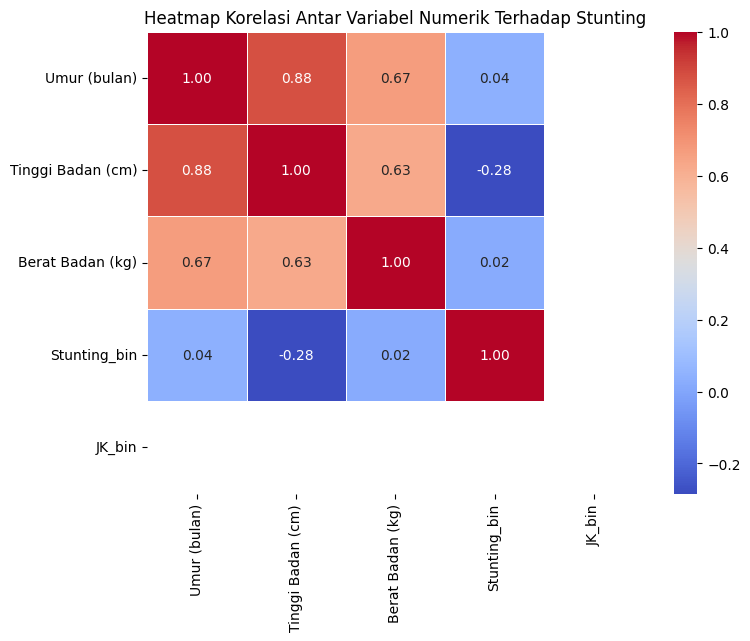

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik Terhadap Stunting", fontsize=12)
plt.show()


Membagi Dataset Menjadi Training dan Testing Set

In [77]:
print(df.columns.tolist())

['Jenis Kelamin', 'Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)', 'Stunting', 'Wasting', 'Stunting_bin', 'JK_bin']


Menentukan Fitur dan Tabel

In [78]:
feature_num = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
feature_bin = ['JK_bin']

use_cols = feature_num + feature_bin + ['Stunting_bin']
df_model = df[use_cols].dropna().copy()

x = df_model[feature_num + feature_bin]
y = df_model['Stunting_bin']

print("x shape:", x.shape)
print("y shape:", y.shape)


x shape: (100000, 4)
y shape: (100000,)


Membagi dataset menjadi training dan testing tes

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan bentuk data hasil pembagian
print("Data latih :", X_train.shape)
print("Data uji   :", X_test.shape)

Data latih : (80000, 4)
Data uji   : (20000, 4)


Permbangunan lmodel logistik

In [80]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")

✅ Model Logistic Regression berhasil dilatih.


Prediksi model dan evaluasi model

In [81]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]


print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi   : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi   : 0.8884
Presisi   : 0.6814
Recall    : 0.9252
F1-Score  : 0.7848
ROC-AUC   : 0.9600


Visualisasi hasil evaluasi

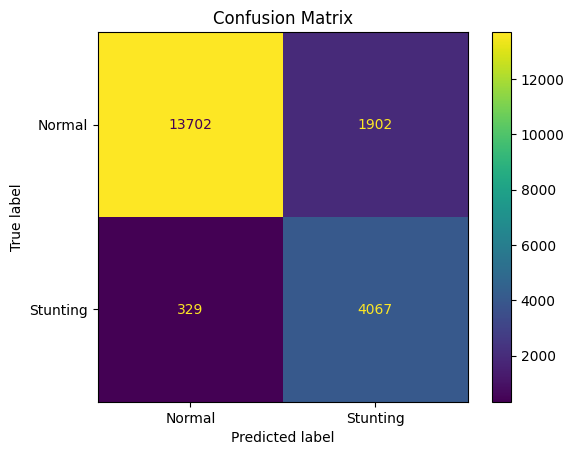

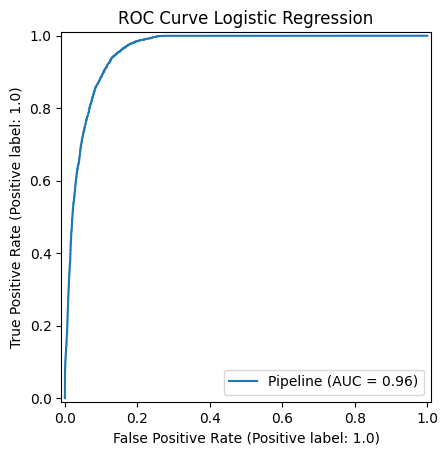

In [82]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Normal', 'Stunting']
).plot(values_format='d')

plt.title("Confusion Matrix")
plt.show()


RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [83]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=['Tidak Stunting (0)', 'Stunting (1)']
))


                    precision    recall  f1-score   support

Tidak Stunting (0)       0.98      0.88      0.92     15604
      Stunting (1)       0.68      0.93      0.78      4396

          accuracy                           0.89     20000
         macro avg       0.83      0.90      0.85     20000
      weighted avg       0.91      0.89      0.89     20000



In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    clf,
    x,
    y,
    cv=5,
    scoring='accuracy'
)
print("Skor tiap fold:", scores)
print("Rata-Rata akurasi:", np.mean(scores))
print("Standar Deviasi akurasi:", np.std(scores))

Skor tiap fold: [0.88965 0.88335 0.88655 0.88185 0.8799 ]
Rata-Rata akurasi: 0.88426
Standar Deviasi akurasi: 0.0034624268945351072


In [85]:
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

feat_imp_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(feat_imp_df)


,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
0,Umur (bulan),7.319719,1509.779379
2,Berat Badan (kg),0.673071,1.960248
3,JK_bin,0.000000,1.000000
1,Tinggi Badan (cm),-9.088140,0.000113


In [86]:
import pandas as pd

data_baru = pd.DataFrame({
    'Umur (bulan)': [24, 10],
    'Tinggi Badan (cm)': [79.0, 72.5],
    'Berat Badan (kg)': [9.2, 7.8],
    'JK_bin': [1, 0]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Stunting'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred

display(hasil)


,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),JK_bin,Prob_Stunting,"Pred (0=Tidak,1=Ya)"
0,24,79.0,9.2,1,0.991894,1.0
1,10,72.5,7.8,0,0.011019,0.0
